In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [3]:
Nclass = 500 # 500 samples per class
D = 2 # dimensions
M = 3 # Number of Hidden layers
K = 3 # number of classes

# 3 gaussian clouds
X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

# create labels
Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
N = len(Y)
# Indicator matrix
T = np.zeros((N,K))
for i in range(N):
    T[i, Y[i]] = 1

In [4]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))

def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid( tf.matmul(X,W1)+b1 )
    return tf.matmul(Z,W2)+b2

In [16]:
tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

# Create symbolic variables
W1 = init_weights([D, M])
b1 = init_weights([M])
W2 = init_weights([M, K])
b1 = init_weights([K])

logits = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=tfY, logits=logits))

train_op = tf.train.GradientDescentOptimizer(0.001).minimize(cost)
predict_op = tf.argmax(logits, 1)

Accuracy: 0.333333333333
Accuracy: 0.368
Accuracy: 0.956
Accuracy: 0.960666666667
Accuracy: 0.961333333333
Accuracy: 0.959333333333
Accuracy: 0.959333333333
Accuracy: 0.96
Accuracy: 0.959333333333
Accuracy: 0.962
Accuracy: 0.962666666667
Accuracy: 0.964
Accuracy: 0.964
Accuracy: 0.964
Accuracy: 0.964
Accuracy: 0.964666666667
Accuracy: 0.965333333333
Accuracy: 0.965333333333
Accuracy: 0.966666666667
Accuracy: 0.966666666667


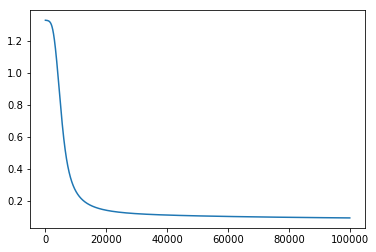

In [19]:
costs = []

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    
    for i in range(100000):
        session.run(train_op, feed_dict={tfX: X, tfY: T})
        
        c = session.run(cost, feed_dict={tfX: X, tfY: T})
        pred = session.run(predict_op, feed_dict={tfX: X, tfy:T})
            
        costs.append(c)
        if i%5000==0:
            print("Accuracy:", np.mean(Y == pred))
    
    plt.plot(costs)
    plt.show();